<a href="https://colab.research.google.com/github/prathyushalahari/Machine-Learning-Model-Implementations/blob/main/Linear_and_Logistic_Regression_model%20on%20IBM%20HR%20Attiration%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of Linear and Logistic Regression Model on IBM HR-Analytics Attiration Dataset**


In [61]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [62]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve # Import roc_curve here

# Load dataset
url = "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/download"
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Explore the dataset
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [63]:
# Check for missing values
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [64]:
# Example: Fill missing values with the mean for numeric columns only
numeric_cols = data.select_dtypes(include=np.number).columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean()) # Fill NaNs in numeric cols with their mean

In [65]:
print(data)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [66]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [67]:
# Check for missing values after conversion
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [68]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric (for simplicity using LabelEncoder)
label_enc = LabelEncoder()

# Apply Label Encoding for binary categorical variables like 'Attrition'
data['Attrition'] = label_enc.fit_transform(data['Attrition'])

# One-hot encoding for other categorical features like JobRole, Department, etc.
data = pd.get_dummies(data, drop_first=True)
#data = pd.get_dummies(data, columns=['JobRole', 'Department', 'BusinessTravel', 'MaritalStatus'], drop_first=True)


print(data)
print(data.dtypes)

      Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41          1       1102                 1          2              1   
1      49          0        279                 8          1              1   
2      37          1       1373                 2          2              1   
3      33          0       1392                 3          4              1   
4      27          0        591                 2          1              1   
...   ...        ...        ...               ...        ...            ...   
1465   36          0        884                23          2              1   
1466   39          0        613                 6          1              1   
1467   27          0        155                 4          3              1   
1468   49          0       1023                 2          3              1   
1469   34          0        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  Hour

In [69]:
from sklearn.model_selection import train_test_split

# For Linear Regression: Predict 'MonthlyIncome'
X_linear = data.drop(['MonthlyIncome'], axis=1)
y_linear = data['MonthlyIncome']

# For Logistic Regression: Predict 'Attrition'
X_logistic = data.drop(['Attrition'], axis=1)
y_logistic = data['Attrition']

# Split the data into train and test sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_linear)
X_test_scaled = scaler.transform(X_test_linear)

X_train_log_scaled = scaler.fit_transform(X_train_logistic)
X_test_log_scaled = scaler.transform(X_test_logistic)



print(data.head())

   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41          1       1102                 1          2              1   
1   49          0        279                 8          1              1   
2   37          1       1373                 2          2              1   
3   33          0       1392                 3          4              1   
4   27          0        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
0               1                        2          94               3  ...   
1               2                        3          61               2  ...   
2               4                        4          92               2  ...   
3               5                        4          56               3  ...   
4               7                        1          40               3  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0              

In [70]:
print(data.describe())
print(data.dtypes)

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1

LINEAR REGRESSION


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score

# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train_linear)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model (Mean Squared Error,Mean Absolute error,R^2 error)

mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
mean_absolute_error_linear = mean_absolute_error(y_test_linear, y_pred_linear)
r2_score_linear = r2_score(y_test_linear, y_pred_linear)
r2_percentage_linear = r2_score_linear * 100

#r2_score_adjusted_linear = 1 - (1 - r2_score_linear) * (len(y_test_linear) - 1) / (len(y_test_linear) - X_test_linear.shape[1] - 1)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression MAE: {mean_absolute_error_linear}")
print(f"Linear Regression R2 Score: {r2_score_linear}")


#print(f"Linear Regression Adjusted R2 Score: {r2_score_adjusted_linear}")

Linear Regression MSE: 1358868.173729588
Linear Regression MAE: 891.7550014905587
Linear Regression R2 Score: 0.9378246275615089


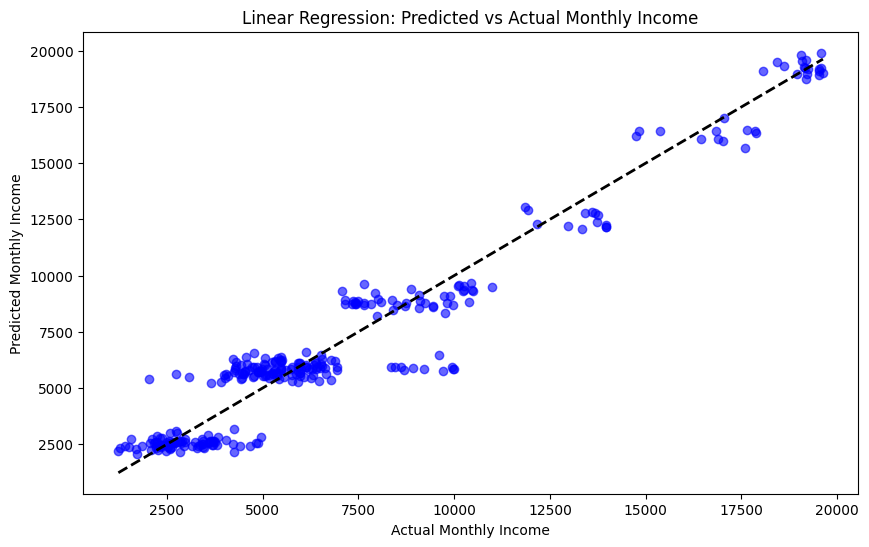

In [72]:
##Linear Regression Graph plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test_linear, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test_linear.min(), y_test_linear.max()], [y_test_linear.min(), y_test_linear.max()], 'k--', lw=2)
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('Linear Regression: Predicted vs Actual Monthly Income')
plt.show()

In [73]:
print(data['Attrition'].value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


LOGISTIC REGRESSION


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, log_loss
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)


# X_train_log_scaled = scaler.fit_transform(X_train_logistic)
# X_test_log_scaled = scaler.transform(X_test_logistic)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_log_scaled, y_train_logistic)

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train_log_scaled, y_train_logistic)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_log_scaled)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")
print(confusion_matrix(y_test_logistic, y_pred_logistic))
print(classification_report(y_test_logistic, y_pred_logistic, zero_division=1))



Logistic Regression Accuracy: 0.8843537414965986
[[242  13]
 [ 21  18]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



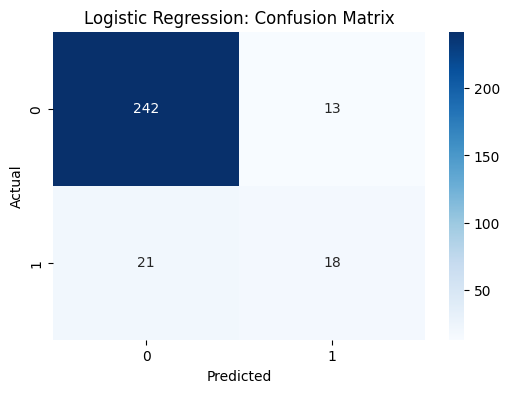

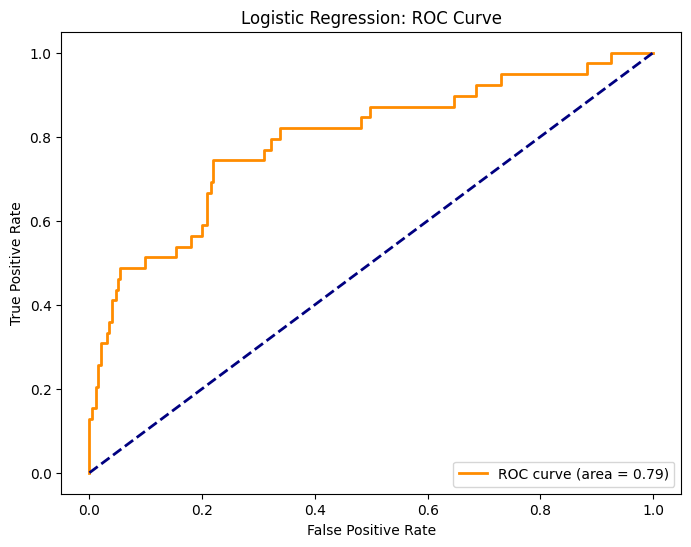

Logistic Regression Accuracy: 0.88


In [75]:
# Confusion Matrix
cm = confusion_matrix(y_test_logistic, y_pred_logistic)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_probs_logistic = logistic_model.predict_proba(X_test_log_scaled)[:,1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_logistic, y_probs_logistic)
roc_auc = roc_auc_score(y_test_logistic, y_probs_logistic)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression: ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and print Accuracy Score for Logistic Regression
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

LINEAR REGRESSION WITH REGULARIZATION


In [76]:
#Lasso (L1) Regularization for Linear Regression:
from sklearn.linear_model import Lasso

# Initialize Lasso model
lasso_model = Lasso(alpha=1.0)

# Train the model
lasso_model.fit(X_train_linear, y_train_linear)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test_linear)

# Evaluate Lasso model (MSE)
mse_lasso = mean_squared_error(y_test_linear, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")


Lasso Regression MSE: 1355165.5825820193


In [77]:
#Ridge (L2) Regularization for Linear Regression:
from sklearn.linear_model import Ridge

# Initialize Ridge model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train_linear, y_train_linear)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_linear)

# Evaluate Ridge model (MSE)
mse_ridge = mean_squared_error(y_test_linear, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")


Ridge Regression MSE: 1355838.6535878407



**Inference on Linear Regression Model:**

*Before Regularization:*

Linear Regression MSE: 1358868.1737296914

*After Regularization:*

Lasso Regression MSE: 1355165.5825820193

Ridge Regression MSE: 1355838.6535878407

**Inference : MSE Mean Squared Eror is Reduced after applying Regularization to Linear Regression model**

**Logistic Regression with Regularization**

In [78]:
from sklearn.linear_model import LogisticRegression

#Ridge regression
# Logistic Regression with L2 regularization (default) and increased max_iter
logistic_model_ridge = LogisticRegression(penalty='l2', max_iter=1000, C=1.0)
logistic_model_ridge.fit(X_train_log_scaled, y_train_logistic)

#Lasso Regression
# Logistic Regression with L1 regularization, increased max_iter and liblinear solver
logistic_model_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C=1.0)
logistic_model_lasso.fit(X_train_log_scaled, y_train_logistic)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [81]:
from sklearn.metrics import accuracy_score

# X_train_log_scaled = scaler.fit_transform(X_train_logistic)
# X_test_log_scaled = scaler.transform(X_test_logistic)

# Predictions and accuracy for L1 regularization
y_pred_l1 = logistic_model_lasso.predict(X_test_log_scaled)
accuracy_l1 = accuracy_score(y_test_logistic, y_pred_l1)
print(f"Logistic Regression with L1 Lasso Accuracy: {accuracy_l1}")

# Predictions and accuracy for L2 regularization
y_pred_l2 = logistic_model_ridge.predict(X_test_log_scaled)
accuracy_l2 = accuracy_score(y_test_logistic, y_pred_l2)
print(f"Logistic Regression with L2 Ridge Accuracy: {accuracy_l2}")

Logistic Regression with L1 Lasso Accuracy: 0.8945578231292517
Logistic Regression with L2 Ridge Accuracy: 0.8843537414965986


**Inference on Logistic Model:**

*Before Regularization Logistic Regression:*

Logistic Regression Accuracy: **0.8673469387755102**

*After Regularization Logistic Regression:*

 Logistic Regression with L1 Lasso Accuracy: **0.8945578231292517**

Logistic Regression with L2 Ridge Accuracy: **0.8809523809523809**

**INFERENCE : Accuracy Improved After applying regularization to Logistic Regression Model**